In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [235]:
df['GBM_300'], gbm_300_std

(Inter-modality registration    43.6
 Resemplimng to size            84.8
 Atlas registration             84.6
 Resemplimng to voxel           85.0
 Bias field correction          82.4
 Denoising                      84.5
 Histogram matching             83.3
 Skull stripping                86.6
 Name: GBM_300, dtype: float64,
 [0.28, 0.11, 0.11, 0.12, 0.13, 0.12, 0.16, 0.11])

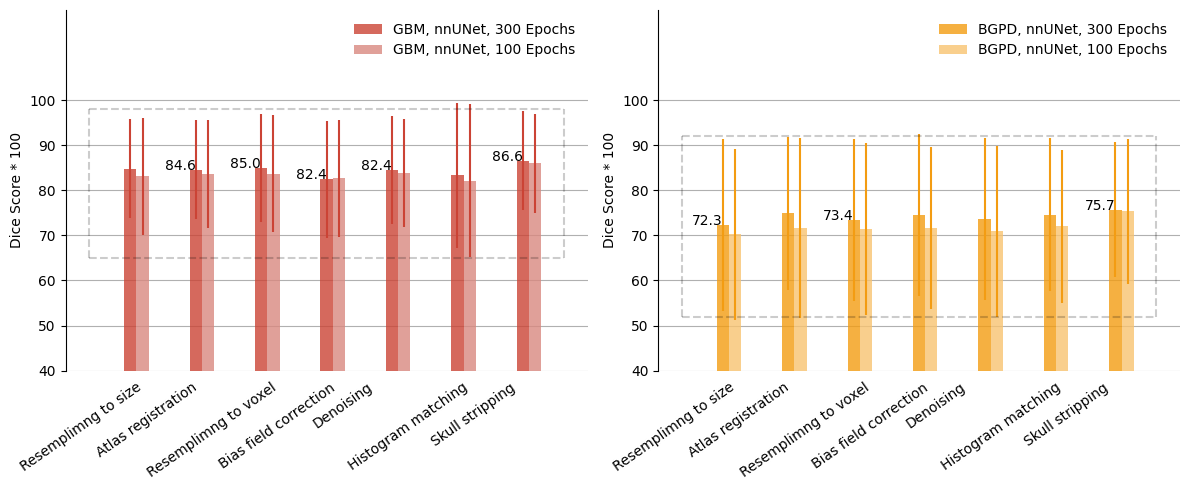

In [349]:
exp = ['Inter-modality registration',
'Resemplimng to size',
'Atlas registration',
'Resemplimng to voxel',
'Bias field correction',
'Denoising',
'Histogram matching',
'Skull stripping']
gbm_100 = [42.3,83.1,83.6,83.7,82.7,83.8,82.1,86.0]
gbm_300 = [43.6,84.8,84.6,85.0,82.4,84.5,83.3,86.6]
bgpd_100 = [34.1,70.2,71.6,71.4,71.7,70.9,72.0,75.3]
bgpd_300 = [35.9,72.3,74.9,73.4,74.6,73.6,74.6,75.7]
gbm_unetr = [39.3,81.7,81.8,82.7,80.0,82.7,81.1,85.0]
bgpd_unetr = [34.3,66.4,67.3,66.8, 68.4,68.8,67.7,71.5]

gbm_100_std = [0.27,0.13,0.12,0.13,0.13,0.12,0.17,0.11]
gbm_300_std = [0.28,0.11,0.11,0.12,0.13,0.12,0.16,0.11]
bgpd_100_std =[0.28,0.19,0.20,0.19,0.18,0.19,0.17,0.16]
bgpd_300_std = [0.29,0.19,0.17,0.18,0.18,0.18,0.17,0.15]
gbm_unetr_std = [0.26,0.13,0.13,0.12,0.13,0.13,0.16,0.11]
bgpd_unetr_std = [0.30,0.21,0.21,0.22,0.20,0.22,0.19,0.18]

gbm_to_bgpd = [0.017,
0.025,
0.021,
-0.002,
0.021,
0.018,
0.016,
-0.008]

gbm_to_bgpd_std = [0.09, 0.08,0.1,0.09,0.09,0.09,0.07,0.07]

bgpd_to_gbm_std = [0.06,0.06,0.05,0.07,0.06,0.06,0.05,0.03]


bgpd_to_gbm =  [0.008,
0.027,
0.022,
0.019,
0.023,
0.025,
0.015,
0.007]



df = pd.DataFrame({ 'GBM_100': gbm_100, 'BGPD_100':
                   bgpd_100, 'GBM_300': gbm_300, 'BGPD_300': 
                   bgpd_300, 'GBM_unetr': gbm_unetr, 'BGPD_unetr': bgpd_unetr, 
                   'BGPD_to_GBM':bgpd_to_gbm, 'GBM_to_BGPD': gbm_to_bgpd,}, index=exp)


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols = 2, figsize=(12,5))
x = np.arange(0,(len(df)-1)*0.8,0.8)
width = 0.15
ax1.bar(x, df['GBM_300'][1:],
        width, color='#CB4335', label='GBM, nnUNet, 300 Epochs', yerr= np.array(gbm_300_std[1:])*100, alpha = 0.8, ecolor= '#CB4335')
# ax.text(2-0.4,df[df.columns[3]][3],df[df.columns[3]][3],horizontalalignment='center')
# plt.text(5-0.2,df[df.columns[3]][7],df[df.columns[3]][7], horizontalalignment='center')

ax1.bar(x+width, df['GBM_100'][1:],
        width,  color ='#D98880', label='GBM, nnUNet, 100 Epochs', yerr = np.array(gbm_100_std[1:])*100, alpha = 0.8, ecolor= '#CB4335')

# ax1.plot(x, df['BGPD_300'][1:], color='#D42F0C', alpha = 0.5)
# ax1.plot(x+0.1, df['BGPD_100'][1:],color='#D46F0C')

ax2.bar(x, df['BGPD_300'][1:],
        width, color='#F39C12', label='BGPD, nnUNet, 300 Epochs', yerr= np.array(bgpd_300_std[1:])*100, alpha = 0.8, ecolor= '#F39C12')

# stat significat results
ax1.text(x[1]-width*2.5,df['GBM_300'][2],df['GBM_300'][2])
#, bbox=dict(facecolor='white',edgecolor='white',pad=0)
ax1.text(x[2]-width*2.5,df['GBM_300'][3],df['GBM_300'][3])
ax1.text(x[3]-width*2.5,df['GBM_300'][4],df['GBM_300'][4])
ax1.text(x[4]-width*2.5,df['GBM_300'][5],df['GBM_300'][4])
ax1.text(x[6]-width*2.5,df['GBM_300'][7],df['GBM_300'][7])

ax2.text(x[0]-width*2.5,df['BGPD_300'][1],df['BGPD_300'][1])
ax2.text(x[2]-width*2.5,df['BGPD_300'][3],df['BGPD_300'][3])
ax2.text(x[6]-width*2.5,df['BGPD_300'][7],df['BGPD_300'][7])

ax2.bar(x+0.15, df['BGPD_100'][1:],
        width,  color ='#F8C471', label='BGPD, nnUNet, 100 Epochs', yerr = np.array(bgpd_100_std[1:])*100, alpha = 0.8,  ecolor= '#F39C12')


# dashed boxes
ax1.hlines(65, x[0]- 0.5 ,x[-1] +0.5,linestyle = 'dashed', color = 'black', alpha = 0.2 )
ax1.hlines(98, x[0]- 0.5 ,x[-1] +0.5,linestyle = 'dashed', color = 'black', alpha = 0.2 )
ax1.vlines(x[0]- 0.5, 65 , 98,linestyle = 'dashed', color = 'black', alpha = 0.2 )
ax1.vlines(x[-1] + 0.5, 65 ,98,linestyle = 'dashed', color = 'black', alpha = 0.2 )

# dashed boxes
ax2.hlines(52, x[0]- 0.5 ,x[-1] +0.5,linestyle = 'dashed', color = 'black', alpha = 0.2 )
ax2.hlines(92, x[0]- 0.5 ,x[-1] +0.5,linestyle = 'dashed', color = 'black', alpha = 0.2 )
ax2.vlines(x[0]- 0.5, 52 , 92,linestyle = 'dashed', color = 'black', alpha = 0.2 )
ax2.vlines(x[-1] + 0.5, 52 ,92,linestyle = 'dashed', color = 'black', alpha = 0.2 )


# Axis formatting.
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
# ax.spines['bottom'].set_color('#DDDDDD')
ax1.tick_params(bottom=False, left=True)
ax1.set_axisbelow(True)
ax1.yaxis.grid(True)
ax1.xaxis.grid(False)

# ax.set_xlabel('Experiments')
ax1.set_ylabel('Dice Score * 100')

# plt.title('Dice score for Whole Tumor', fontsize=25)
# plt.xlabel(None)
sns.despine(bottom=True)
# ax.grid(False)
# ax.tick_params(bottom=False, left=True)

# Axis formatting.
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
# ax.spines['bottom'].set_color('#DDDDDD')
ax2.tick_params(bottom=False, left=True)
ax2.set_axisbelow(True)
ax2.yaxis.grid(True)
ax2.xaxis.grid(False)

# ax.set_xlabel('Experiments')
ax2.set_ylabel('Dice Score * 100')

# plt.title('Dice score for Whole Tumor', fontsize=25)
# plt.xlabel(None)
ax1.set_xticks(x - 0.6, df.index[1:], rotation=35)
ax2.set_xticks(x - 0.6, df.index[1:], rotation=35)
ax1.set_yticks(np.arange(40,110,10))
ax2.set_yticks(np.arange(40,110,10))
sns.despine(bottom=True)
# ax.grid(False)
# ax.tick_params(bottom=False, left=True)
ax1.legend(frameon=False, loc='best')
ax2.legend(frameon=False, loc='best')

# ax.set_title('Dice score for Whole Tumor on BGPD data')
plt.axis('tight')
ax1.set_ylim(40, 120)
ax2.set_ylim(40, 120)
fig.tight_layout()

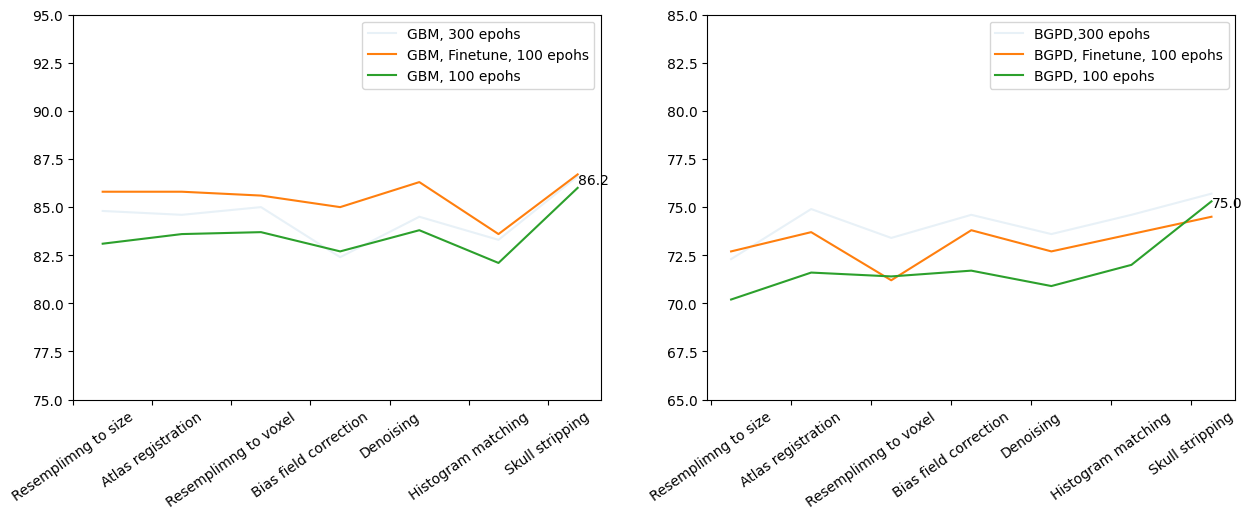

In [361]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

ax1.plot(x*2, gbm_300[1:], label = 'GBM, 300 epohs', alpha = 0.1)
ax1.plot(x*2, np.array(gbm_100[1:]) + np.array(bgpd_to_gbm[1:])*100, label = 'GBM, Finetune, 100 epohs')
ax1.plot(x*2, gbm_100[1:], label =  'GBM, 100 epohs')
ax1.set_ylim(75,95)
ax1.legend()


#big datasets
ax1.text(x[6]*2,86.2,86.2)
ax2.text(x[6]*2,75.0,75.0)


# caps
# (_, caps, _) = ax1.errorbar(
#     x*2, np.array(gbm_100[1:]) + np.array(bgpd_to_gbm[1:])*100, yerr=np.array(bgpd_to_gbm_std[1:])*100, fmt='o', markersize=4, capsize=2)
# (_, caps, _) = ax1.errorbar(
#     x*2 + 0.4, np.array(gbm_100[1:]), yerr=np.array(gbm_100_std[1:])*100, fmt='o', markersize=4, capsize=2)
# (_, caps, _) = ax1.errorbar(
#     x*2 + 0.7, np.array(gbm_300[1:]), yerr=np.array(gbm_300_std[1:])*100, fmt='o', markersize=4, capsize=2)


# (_, caps, _) = ax2.errorbar(
#     x*2, np.array(bgpd_100[1:]) + np.array(gbm_to_bgpd[1:])*100, yerr=np.array(gbm_to_bgpd_std[1:])*100, fmt='o', markersize=2, capsize=2)
# (_, caps, _) = ax2.errorbar(
#     x*2 + 0.4, np.array(bgpd_100[1:]), yerr=np.array(bgpd_100_std[1:])*100, fmt='o', markersize=4, capsize=2)
# (_, caps, _) = ax2.errorbar(
#     x*2 + 0.7, np.array(bgpd_300[1:]), yerr=np.array(bgpd_300_std[1:])*100, fmt='o', markersize=4, capsize=2)

ax1.set_xticks(x*2 - 0.6, df.index[1:], rotation=35)
ax2.set_xticks(x*2 - 0.4, df.index[1:], rotation=35)


ax2.plot(x*2, bgpd_300[1:], label = 'BGPD,300 epohs', alpha = 0.1)
ax2.plot(x*2, np.array(bgpd_100[1:]) + np.array(gbm_to_bgpd[1:])*100, label = 'BGPD, Finetune, 100 epohs')
ax2.plot(x*2, bgpd_100[1:],label =  'BGPD, 100 epohs')
ax2.set_ylim(65, 85)
ax2.legend()

# ax1.axis('tight')

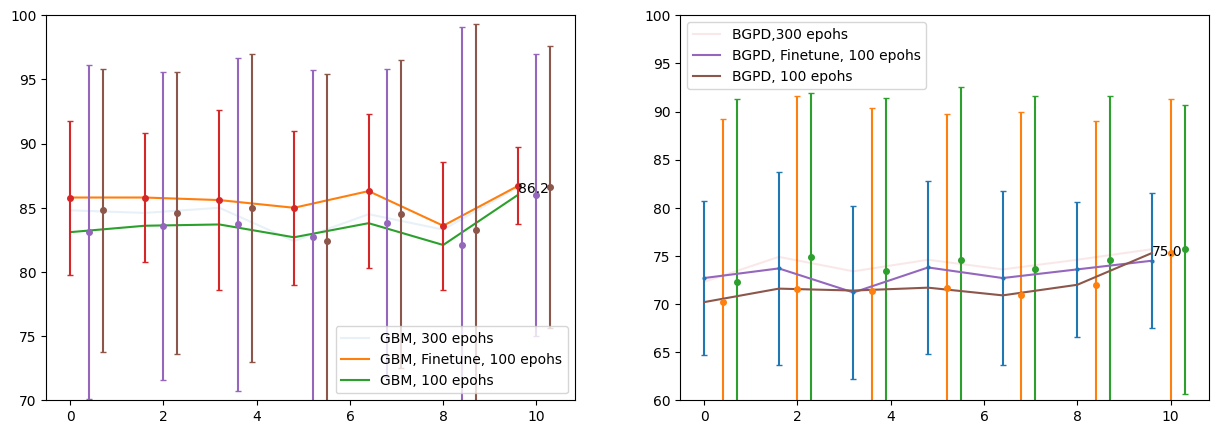

In [347]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

ax1.plot(x*2, gbm_300[1:], label = 'GBM, 300 epohs', alpha = 0.1)
ax1.plot(x*2, np.array(gbm_100[1:]) + np.array(bgpd_to_gbm[1:])*100, label = 'GBM, Finetune, 100 epohs')
ax1.plot(x*2, gbm_100[1:], label =  'GBM, 100 epohs')
ax1.set_ylim(70,100)
ax1.legend()


#big datasets
ax1.text(x[6]*2,86.2,86.2)
ax2.text(x[6]*2,75.0,75.0)


# caps
# (_, caps, _) = ax1.errorbar(
#     x*2, np.array(gbm_100[1:]) + np.array(bgpd_to_gbm[1:])*100, yerr=np.array(bgpd_to_gbm_std[1:])*100, fmt='o', markersize=4, capsize=2)
# (_, caps, _) = ax1.errorbar(
#     x*2 + 0.4, np.array(gbm_100[1:]), yerr=np.array(gbm_100_std[1:])*100, fmt='o', markersize=4, capsize=2)
# (_, caps, _) = ax1.errorbar(
#     x*2 + 0.7, np.array(gbm_300[1:]), yerr=np.array(gbm_300_std[1:])*100, fmt='o', markersize=4, capsize=2)


# (_, caps, _) = ax2.errorbar(
#     x*2, np.array(bgpd_100[1:]) + np.array(gbm_to_bgpd[1:])*100, yerr=np.array(gbm_to_bgpd_std[1:])*100, fmt='o', markersize=2, capsize=2)
# (_, caps, _) = ax2.errorbar(
#     x*2 + 0.4, np.array(bgpd_100[1:]), yerr=np.array(bgpd_100_std[1:])*100, fmt='o', markersize=4, capsize=2)
# (_, caps, _) = ax2.errorbar(
#     x*2 + 0.7, np.array(bgpd_300[1:]), yerr=np.array(bgpd_300_std[1:])*100, fmt='o', markersize=4, capsize=2)



ax2.plot(x*2, bgpd_300[1:], label = 'BGPD,300 epohs', alpha = 0.1)
ax2.plot(x*2, np.array(bgpd_100[1:]) + np.array(gbm_to_bgpd[1:])*100, label = 'BGPD, Finetune, 100 epohs')
ax2.plot(x*2, bgpd_100[1:],label =  'BGPD, 100 epohs')
ax2.set_ylim(60, 100)
ax2.legend()

# ax1.axis('tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 6.0)

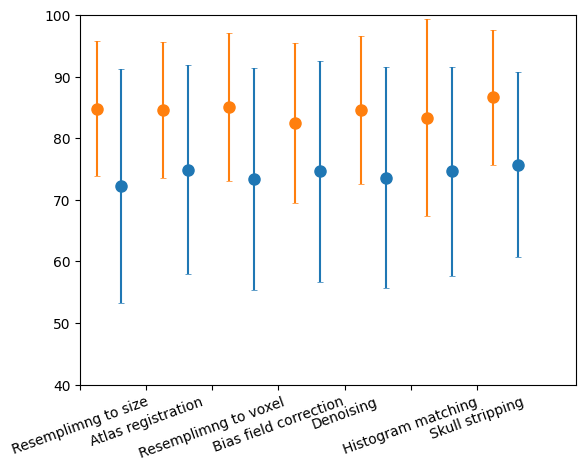

In [91]:
(_, caps, _) = plt.errorbar(
    x+0.5, df['BGPD_300'][1:], yerr=np.array(bgpd_300_std[1:])*100, fmt='o', markersize=8, capsize=2)

for cap in caps:
    cap.set_markeredgewidth(0.5)

(_, caps, _) = plt.errorbar(
    x+0.2, df['GBM_300'][1:], yerr=np.array(gbm_300_std[1:])*100, fmt='o', markersize=8, capsize=2)

for cap in caps:
    cap.set_markeredgewidth(0.5)

plt.xticks(x, df.index[1:], rotation=20)
plt.ylim(40,100)
plt.xlim(0,6)

In [ ]:
x+0.2, ,
        width,  label='BGPD:UNETR',yerr = 

In [48]:
bgpd_unetr_std[1:]

[0.21, 0.21, 0.22, 0.2, 0.22, 0.19, 0.18]

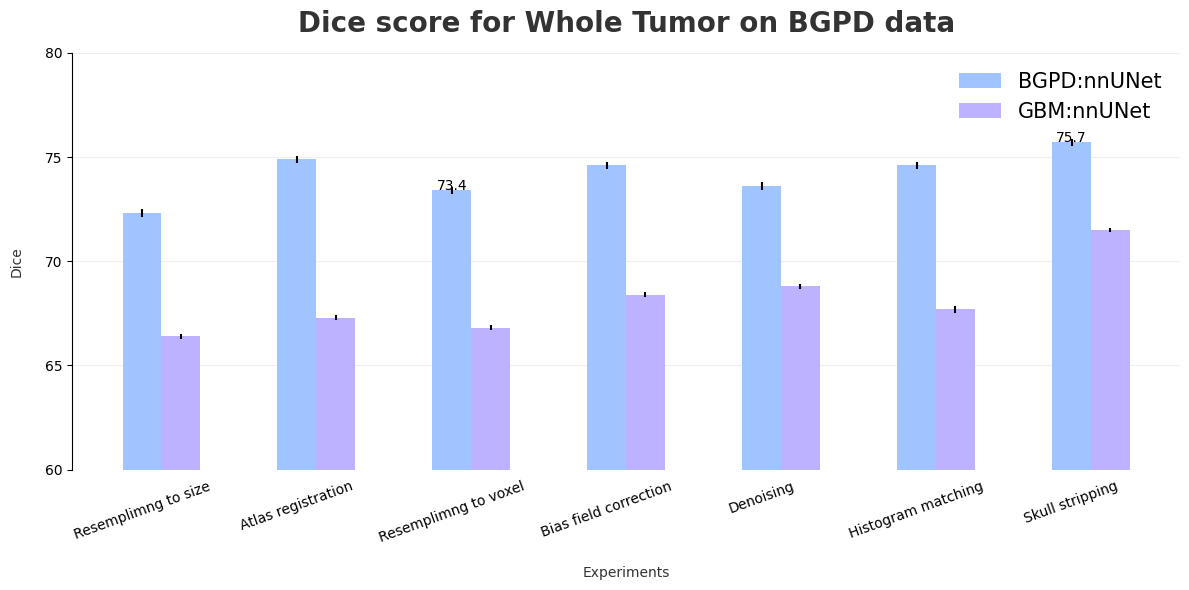

In [39]:
fig, ax = plt.subplots(figsize=(12,6))
x = np.arange(0,(len(df)-1)*0.8,0.8)
width = 0.2
plt.bar(x, df[df.columns[3]][1:],width, color='#A0C4FF', label='BGPD:nnUNet',yerr= bgpd_300_std[1:])
ax.text(2-0.4,df[df.columns[3]][3],df[df.columns[3]][3],  horizontalalignment='center' )
plt.text(5-0.2,df[df.columns[3]][7],df[df.columns[3]][7], horizontalalignment='center')
plt.bar(x+0.2, df[df.columns[5]][1:],width, color='#BDB2FF', label='GBM:nnUNet',yerr=gbm_300_std[1:])

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=True)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# plt.title('Dice score for Whole Tumor', fontsize=25)
# plt.xlabel(None)
plt.xticks(x, df.index[1:], rotation=20)
plt.yticks(np.arange(0,100,5))
sns.despine(bottom=True)
# ax.grid(False)
# ax.tick_params(bottom=False, left=True)
plt.legend(frameon=False, fontsize=15, loc='best')

ax.set_xlabel('Experiments', labelpad=15, color='#333333')
ax.set_ylabel('Dice', labelpad=15, color='#333333')
ax.set_title('Dice score for Whole Tumor on BGPD data', pad=15, color='#333333',
             weight='bold', fontsize=20)
plt.axis('tight')
plt.ylim(60, 80)
fig.tight_layout()

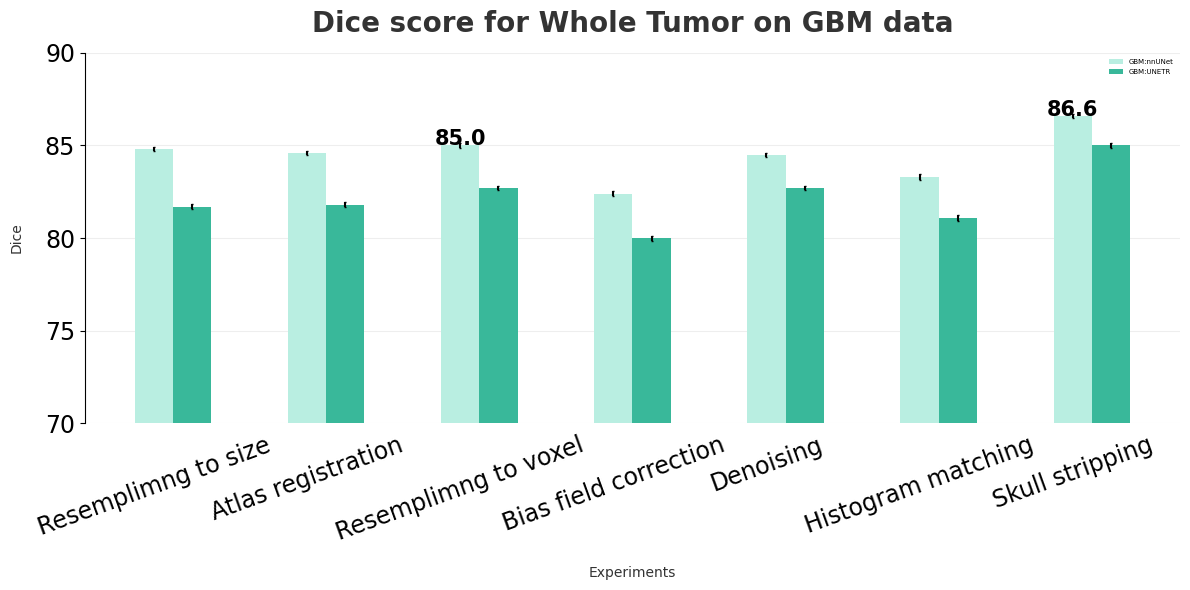

In [36]:
fig, ax = plt.subplots(figsize=(12,6))
x = np.arange(0,(len(df)-1)*0.8,0.8)
width = 0.2
# plt.bar(x, df[df.columns[0]],
#         width, color='#DEF3F0', label=df.columns[0])
plt.bar(x, df[df.columns[2]][1:],
        width, color='#B9EEE1', label='GBM:nnUNet',yerr=gbm_300_std[1:],capsize=1)
ax.text(2-0.4,df[df.columns[2]][3],df[df.columns[2]][3],
      horizontalalignment='center',
      weight='bold', fontsize=15
  )
plt.text(5-0.2,df[df.columns[2]][7],df[df.columns[2]][7], horizontalalignment='center',
      weight='bold', fontsize=15)

plt.bar(x+0.2, df[df.columns[4]][1:],
        width, color='#39B89A', label='GBM:UNETR',yerr=gbm_unetr_std[1:], capsize=1)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=True)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# plt.title('Dice score for Whole Tumor', fontsize=25)
# plt.xlabel(None)
plt.xticks(x, df.index[1:], fontsize=17, rotation=20)
plt.yticks(np.arange(0,100,5),fontsize=17)
sns.despine(bottom=True)
# ax.grid(False)
# ax.tick_params(bottom=False, left=True)
plt.legend(frameon=False, fontsize=5, loc='best')

ax.set_xlabel('Experiments', labelpad=15, color='#333333')
ax.set_ylabel('Dice', labelpad=15, color='#333333')
ax.set_title('Dice score for Whole Tumor on GBM data', pad=15, color='#333333',
             weight='bold', fontsize=20)
plt.axis('tight')
plt.ylim(70, 90)
fig.tight_layout()